(proj-tools)=

# Projection tools

This section describes projection tools that are common to {class}`Rasters<geoutils.Raster>` and {class}`Vectors<geoutils.Vector>`, and facilitate
geospatial analysis.

## Get a metric coordinate system

A local metric coordinate system can be estimated for both {class}`Rasters<geoutils.Raster>` and {class}`Vectors<geoutils.Vector>` through the
{func}`~geoutils.Raster.get_metric_crs` function.

The metric system returned can be either "universal" (zone of the Universal Transverse Mercator or Universal Polar Stereographic system), or "custom"
(Mercator or Polar projection centered on the {class}`Raster<geoutils.Raster>` or {class}`Vector<geoutils.Vector>`).

In [1]:
import geoutils as gu

# Initiate a raster from disk
rast = gu.Raster(gu.examples.get_path("exploradores_aster_dem"))
rast.info()

# Estimate a universal metric CRS for the raster
rast.get_metric_crs()

Driver:               GTiff 
Opened from file:     /home/docs/checkouts/readthedocs.org/user_builds/geoutils/checkouts/latest/examples/data/Exploradores_ASTER/AST_L1A_00303182012144228_Z.tif 
Filename:             /home/docs/checkouts/readthedocs.org/user_builds/geoutils/checkouts/latest/examples/data/Exploradores_ASTER/AST_L1A_00303182012144228_Z.tif 
Loaded?               False 
Modified since load?  False 
Grid size:                 539, 618
Number of bands:      1
Data types:           float32
Coordinate system:    ['EPSG:32718']
Nodata value:         -9999.0
Pixel interpretation: Area
Pixel size:           30.0, 30.0
Upper left corner:    627175.0, 4833545.0
Lower right corner:   643345.0, 4852085.0



<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Get projected bounds

Projected bounds can be directly derived from both {class}`Rasters<geoutils.Raster>` and {class}`Vectors<geoutils.Vector>` through the
{func}`~geoutils.Raster.get_bounds_projected` function.

In [2]:
# Get raster bounds in geographic CRS by passing its EPSG code
rast.get_bounds_projected(4326)

BoundingBox(left=-73.34341974540035, bottom=-46.639587475004994, right=-73.1271672077634, top=-46.469563567694934)

```{important}
When projecting to a new CRS, the footprint shape of the data is generally deformed. To account for this, use {func}`~geoutils.Raster.get_footprint_projected` described below.
```

## Get projected footprint

A projected footprint can be derived from both {class}`Rasters<geoutils.Raster>` and {class}`Vectors<geoutils.Vector>` through the
{func}`~geoutils.Raster.get_footprint_projected` function.

For this, the original rectangular footprint polygon lines are densified to respect the deformation during reprojection.

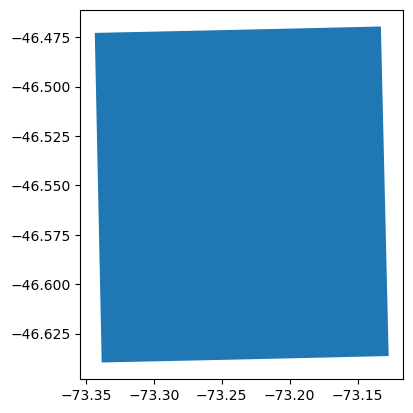

In [3]:
# Get raster footprint in geographic CRS
rast_footprint = rast.get_footprint_projected(4326)

rast_footprint.plot()

This is for instance useful to check for intersection with other data.